**Various experiments with weights and biases of hyperparameters in weights and biases of various optimizers, layer depth width, learning rate etc.,. both in keras and pytorch**

In [1]:
!pip install wandb -qqq
import wandb

     |████████████████████████████████| 1.8 MB 7.6 MB/s 
     |████████████████████████████████| 181 kB 66.3 MB/s 
     |████████████████████████████████| 144 kB 55.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 


In [2]:
# Log in to your W&B account
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#**Keras** 



Now, we will take about 15 different experiments on MNIST dataset with different hyperparameters 

In [3]:
import random

import numpy as np
import tensorflow as tf
from wandb.keras import WandbCallback
# 15 random models
for run in range(15):
  # Start a run, tracking hyperparameters
  wandb.init(
      project="keras-intro",
# We will dfine and the necessary 
      config={
          "layer_1": 512,
          "activation_1": "relu",
          "dropout": random.uniform(0.01, 0.80),
          "layer_2": 10,
          "activation_2": "softmax",
          "optimizer": "sgd",
          "loss": "sparse_categorical_crossentropy",
          "metric": "accuracy",
          "epoch": 6,
          "batch_size": 256
      })
  config = wandb.config

  # Loading the MNIST dataset
  mnist = tf.keras.datasets.mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train, x_test = x_train / 255.0, x_test / 255.0
  x_train, y_train = x_train[::5], y_train[::5]  # Subset data for a faster demo
  x_test, y_test = x_test[::20], y_test[::20]
  labels = [str(digit) for digit in range(np.max(y_train) + 1)]

  # Build a model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(config.layer_1, activation=config.activation_1),
      tf.keras.layers.Dropout(config.dropout),
      tf.keras.layers.Dense(config.layer_2, activation=config.activation_2)
      ])

  model.compile(optimizer=config.optimizer,
                loss=config.loss,
                metrics=[config.metric]
                )

  # WandbCallback auto-saves all metrics from model.fit(), plus predictions on validation_data
  logging_callback = WandbCallback(log_evaluation=True)

  history = model.fit(x=x_train, y=y_train,
                      epochs=config.epoch,
                      batch_size=config.batch_size,
                      validation_data=(x_test, y_test),
                      callbacks=[logging_callback]
                      )

  # Mark the run as finished
  wandb.finish()


wandb: Currently logged in as: rajviishah (use `wandb login --relogin` to force relogin)


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1056 - accuracy: 0.2817 - val_loss: 1.8420 - val_accuracy: 0.6140 - _timestamp: 1649989327.0000 - _runtime: 23.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6892 - accuracy: 0.5761 - val_loss: 1.4840 - val_accuracy: 0.7200 - _timestamp: 1649989327.0000 - _runtime: 23.0000
Epoch 3/6
47/47 [==============================] - 1s 13ms/step - loss: 1.3875 - accuracy: 0.6894 - val_loss: 1.2261 - val_accuracy: 0.7680 - _timestamp: 1649989328.0000 - _runtime: 24.0000
Epoch 4/6
47/47 [==============================] - 1s 13ms/step - loss: 1.1740 - accuracy: 0.7428 - val_loss: 1.0443 - val_accuracy: 0.7980 - _timestamp: 1649989329.0000 - _runtime: 25.0000
Epoch 5/6
47/47 [==============================] - 1s 13ms/step - loss: 1.0248 - accuracy: 0.7716 - val_loss: 0.9158 - val_accuracy: 0.8000 - _timestamp: 1649989329.0000 - _ru

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆███
val_loss,█▆▄▃▂▁
accuracy,0.78992
best_epoch,5
best_val_loss,0.82288
epoch,5
loss,0.91461
val_accuracy,0.812


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1187 - accuracy: 0.2556 - val_loss: 1.8557 - val_accuracy: 0.6020 - _timestamp: 1649989343.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 13ms/step - loss: 1.7374 - accuracy: 0.5205 - val_loss: 1.5272 - val_accuracy: 0.7000 - _timestamp: 1649989344.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4595 - accuracy: 0.6403 - val_loss: 1.2783 - val_accuracy: 0.7580 - _timestamp: 1649989345.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2546 - accuracy: 0.6972 - val_loss: 1.0955 - val_accuracy: 0.7960 - _timestamp: 1649989345.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1080 - accuracy: 0.7251 - val_loss: 0.9622 - val_accuracy: 0.8080 - _timestamp: 1649989346.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▄▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.75483
best_epoch,5
best_val_loss,0.86374
epoch,5
loss,0.99335
val_accuracy,0.822


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.2010 - accuracy: 0.2142 - val_loss: 1.8933 - val_accuracy: 0.5380 - _timestamp: 1649989360.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.8067 - accuracy: 0.4593 - val_loss: 1.5588 - val_accuracy: 0.7040 - _timestamp: 1649989361.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.5169 - accuracy: 0.6012 - val_loss: 1.3039 - val_accuracy: 0.7660 - _timestamp: 1649989362.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 15ms/step - loss: 1.3102 - accuracy: 0.6656 - val_loss: 1.1150 - val_accuracy: 0.7840 - _timestamp: 1649989363.0000 - _runtime: 11.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1506 - accuracy: 0.7046 - val_loss: 0.9769 - val_accuracy: 0.8000 - _timestamp: 1649989363.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.72883
best_epoch,5
best_val_loss,0.87411
epoch,5
loss,1.03945
val_accuracy,0.816


Epoch 1/6
47/47 [==============================] - 1s 16ms/step - loss: 2.3082 - accuracy: 0.1784 - val_loss: 1.8858 - val_accuracy: 0.5760 - _timestamp: 1649989378.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 13ms/step - loss: 1.9165 - accuracy: 0.3549 - val_loss: 1.5810 - val_accuracy: 0.7120 - _timestamp: 1649989379.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6522 - accuracy: 0.4816 - val_loss: 1.3526 - val_accuracy: 0.7620 - _timestamp: 1649989379.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 13ms/step - loss: 1.4684 - accuracy: 0.5482 - val_loss: 1.1818 - val_accuracy: 0.7880 - _timestamp: 1649989380.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 13ms/step - loss: 1.3208 - accuracy: 0.6047 - val_loss: 1.0510 - val_accuracy: 0.7940 - _timestamp: 1649989381.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▄▆▇▇█
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.6435
best_epoch,5
best_val_loss,0.95008
epoch,5
loss,1.2091
val_accuracy,0.806


Epoch 1/6
47/47 [==============================] - 1s 16ms/step - loss: 2.1491 - accuracy: 0.2605 - val_loss: 1.8665 - val_accuracy: 0.5580 - _timestamp: 1649989396.0000 - _runtime: 9.0000
Epoch 2/6
47/47 [==============================] - 1s 13ms/step - loss: 1.7409 - accuracy: 0.5102 - val_loss: 1.5194 - val_accuracy: 0.7060 - _timestamp: 1649989396.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4581 - accuracy: 0.6277 - val_loss: 1.2647 - val_accuracy: 0.7620 - _timestamp: 1649989397.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 13ms/step - loss: 1.2435 - accuracy: 0.6935 - val_loss: 1.0820 - val_accuracy: 0.7900 - _timestamp: 1649989398.0000 - _runtime: 11.0000
Epoch 5/6
47/47 [==============================] - 1s 13ms/step - loss: 1.0911 - accuracy: 0.7303 - val_loss: 0.9497 - val_accuracy: 0.8020 - _timestamp: 1649989398.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.75167
best_epoch,5
best_val_loss,0.85214
epoch,5
loss,0.98556
val_accuracy,0.816


Epoch 1/6
47/47 [==============================] - 1s 16ms/step - loss: 2.1671 - accuracy: 0.2386 - val_loss: 1.8728 - val_accuracy: 0.5260 - _timestamp: 1649989412.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.7474 - accuracy: 0.4963 - val_loss: 1.5188 - val_accuracy: 0.6940 - _timestamp: 1649989413.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4557 - accuracy: 0.6212 - val_loss: 1.2625 - val_accuracy: 0.7600 - _timestamp: 1649989414.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 13ms/step - loss: 1.2472 - accuracy: 0.6813 - val_loss: 1.0785 - val_accuracy: 0.7940 - _timestamp: 1649989414.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 13ms/step - loss: 1.0933 - accuracy: 0.7217 - val_loss: 0.9466 - val_accuracy: 0.8040 - _timestamp: 1649989415.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇███
val_loss,█▆▄▃▂▁
accuracy,0.74608
best_epoch,5
best_val_loss,0.84888
epoch,5
loss,0.98103
val_accuracy,0.808


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.0925 - accuracy: 0.2876 - val_loss: 1.8064 - val_accuracy: 0.6020 - _timestamp: 1649989429.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6803 - accuracy: 0.5472 - val_loss: 1.4574 - val_accuracy: 0.7240 - _timestamp: 1649989430.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3848 - accuracy: 0.6667 - val_loss: 1.2095 - val_accuracy: 0.7720 - _timestamp: 1649989430.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1833 - accuracy: 0.7227 - val_loss: 1.0346 - val_accuracy: 0.8060 - _timestamp: 1649989431.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0385 - accuracy: 0.7518 - val_loss: 0.9100 - val_accuracy: 0.8180 - _timestamp: 1649989432.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.77942
best_epoch,5
best_val_loss,0.81893
epoch,5
loss,0.92853
val_accuracy,0.828


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1744 - accuracy: 0.2267 - val_loss: 1.9232 - val_accuracy: 0.4860 - _timestamp: 1649989446.0000 - _runtime: 9.0000
Epoch 2/6
47/47 [==============================] - 1s 13ms/step - loss: 1.7675 - accuracy: 0.5350 - val_loss: 1.5641 - val_accuracy: 0.6800 - _timestamp: 1649989447.0000 - _runtime: 10.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4606 - accuracy: 0.6634 - val_loss: 1.2968 - val_accuracy: 0.7360 - _timestamp: 1649989447.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2384 - accuracy: 0.7182 - val_loss: 1.1028 - val_accuracy: 0.7780 - _timestamp: 1649989448.0000 - _runtime: 11.0000
Epoch 5/6
47/47 [==============================] - 1s 13ms/step - loss: 1.0753 - accuracy: 0.7557 - val_loss: 0.9642 - val_accuracy: 0.7980 - _timestamp: 1649989448.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.77825
best_epoch,5
best_val_loss,0.86284
epoch,5
loss,0.95327
val_accuracy,0.816


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.2623 - accuracy: 0.1813 - val_loss: 1.8557 - val_accuracy: 0.6040 - _timestamp: 1649989464.0000 - _runtime: 9.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.8482 - accuracy: 0.3908 - val_loss: 1.5386 - val_accuracy: 0.7340 - _timestamp: 1649989464.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.5811 - accuracy: 0.5198 - val_loss: 1.3085 - val_accuracy: 0.7620 - _timestamp: 1649989465.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3931 - accuracy: 0.5930 - val_loss: 1.1363 - val_accuracy: 0.7880 - _timestamp: 1649989466.0000 - _runtime: 11.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2445 - accuracy: 0.6357 - val_loss: 1.0084 - val_accuracy: 0.7980 - _timestamp: 1649989466.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▅▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.66958
best_epoch,5
best_val_loss,0.91095
epoch,5
loss,1.13109
val_accuracy,0.812


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1272 - accuracy: 0.2756 - val_loss: 1.8467 - val_accuracy: 0.5880 - _timestamp: 1649989481.0000 - _runtime: 9.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.7000 - accuracy: 0.5621 - val_loss: 1.4974 - val_accuracy: 0.7100 - _timestamp: 1649989481.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4106 - accuracy: 0.6674 - val_loss: 1.2436 - val_accuracy: 0.7620 - _timestamp: 1649989482.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1972 - accuracy: 0.7228 - val_loss: 1.0642 - val_accuracy: 0.7920 - _timestamp: 1649989482.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 13ms/step - loss: 1.0469 - accuracy: 0.7572 - val_loss: 0.9372 - val_accuracy: 0.8060 - _timestamp: 1649989483.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▅▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.77825
best_epoch,5
best_val_loss,0.84353
epoch,5
loss,0.9358
val_accuracy,0.812


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.0959 - accuracy: 0.3102 - val_loss: 1.8643 - val_accuracy: 0.5660 - _timestamp: 1649989497.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6885 - accuracy: 0.6062 - val_loss: 1.5100 - val_accuracy: 0.7120 - _timestamp: 1649989498.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3901 - accuracy: 0.7076 - val_loss: 1.2465 - val_accuracy: 0.7660 - _timestamp: 1649989499.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1682 - accuracy: 0.7615 - val_loss: 1.0564 - val_accuracy: 0.7900 - _timestamp: 1649989499.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0132 - accuracy: 0.7897 - val_loss: 0.9204 - val_accuracy: 0.8120 - _timestamp: 1649989500.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.81267
best_epoch,5
best_val_loss,0.82229
epoch,5
loss,0.89391
val_accuracy,0.814


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.0810 - accuracy: 0.3717 - val_loss: 1.8305 - val_accuracy: 0.5960 - _timestamp: 1649989515.0000 - _runtime: 9.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6507 - accuracy: 0.6653 - val_loss: 1.4689 - val_accuracy: 0.7380 - _timestamp: 1649989515.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3430 - accuracy: 0.7484 - val_loss: 1.2108 - val_accuracy: 0.7740 - _timestamp: 1649989516.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1248 - accuracy: 0.7885 - val_loss: 1.0314 - val_accuracy: 0.7880 - _timestamp: 1649989517.0000 - _runtime: 11.0000
Epoch 5/6
47/47 [==============================] - 1s 13ms/step - loss: 0.9714 - accuracy: 0.8134 - val_loss: 0.9035 - val_accuracy: 0.8000 - _timestamp: 1649989517.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▆▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇▇█
val_loss,█▆▄▃▂▁
accuracy,0.82208
best_epoch,5
best_val_loss,0.81139
epoch,5
loss,0.85966
val_accuracy,0.822


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1524 - accuracy: 0.2398 - val_loss: 1.8262 - val_accuracy: 0.6000 - _timestamp: 1649989533.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 13ms/step - loss: 1.7451 - accuracy: 0.4933 - val_loss: 1.4860 - val_accuracy: 0.7180 - _timestamp: 1649989534.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.4609 - accuracy: 0.6148 - val_loss: 1.2400 - val_accuracy: 0.7720 - _timestamp: 1649989534.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.2556 - accuracy: 0.6779 - val_loss: 1.0636 - val_accuracy: 0.7880 - _timestamp: 1649989535.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1080 - accuracy: 0.7112 - val_loss: 0.9359 - val_accuracy: 0.8060 - _timestamp: 1649989536.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.7415
best_epoch,5
best_val_loss,0.842
epoch,5
loss,0.99607
val_accuracy,0.814


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.0804 - accuracy: 0.3391 - val_loss: 1.8311 - val_accuracy: 0.6040 - _timestamp: 1649989550.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6670 - accuracy: 0.6315 - val_loss: 1.4793 - val_accuracy: 0.6960 - _timestamp: 1649989551.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3640 - accuracy: 0.7132 - val_loss: 1.2238 - val_accuracy: 0.7540 - _timestamp: 1649989552.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 1s 13ms/step - loss: 1.1475 - accuracy: 0.7606 - val_loss: 1.0443 - val_accuracy: 0.7900 - _timestamp: 1649989552.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 0.9959 - accuracy: 0.7869 - val_loss: 0.9161 - val_accuracy: 0.8020 - _timestamp: 1649989553.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▄▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.80825
best_epoch,5
best_val_loss,0.8232
epoch,5
loss,0.88586
val_accuracy,0.816


Epoch 1/6
47/47 [==============================] - 1s 17ms/step - loss: 2.1144 - accuracy: 0.2999 - val_loss: 1.8432 - val_accuracy: 0.5960 - _timestamp: 1649989567.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 1s 14ms/step - loss: 1.6773 - accuracy: 0.6146 - val_loss: 1.4852 - val_accuracy: 0.7220 - _timestamp: 1649989568.0000 - _runtime: 9.0000
Epoch 3/6
47/47 [==============================] - 1s 14ms/step - loss: 1.3765 - accuracy: 0.7130 - val_loss: 1.2271 - val_accuracy: 0.7860 - _timestamp: 1649989568.0000 - _runtime: 9.0000
Epoch 4/6
47/47 [==============================] - 1s 14ms/step - loss: 1.1621 - accuracy: 0.7616 - val_loss: 1.0444 - val_accuracy: 0.8100 - _timestamp: 1649989569.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 1s 14ms/step - loss: 1.0077 - accuracy: 0.7874 - val_loss: 0.9147 - val_accuracy: 0.8220 - _timestamp: 1649989570.0000 - _runtime: 11.0000
Epoch 6/6
47/47 [==============================] - 1s

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▅▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.80567
best_epoch,5
best_val_loss,0.82161
epoch,5
loss,0.8987
val_accuracy,0.828


Note: As looked from the above images and statistics, for a differet set of hyperparamters like droupout and learning rates, the loss and accuracy values changes and the accuracy may range from 70% to even as high as 85% depending on the parameters defined .

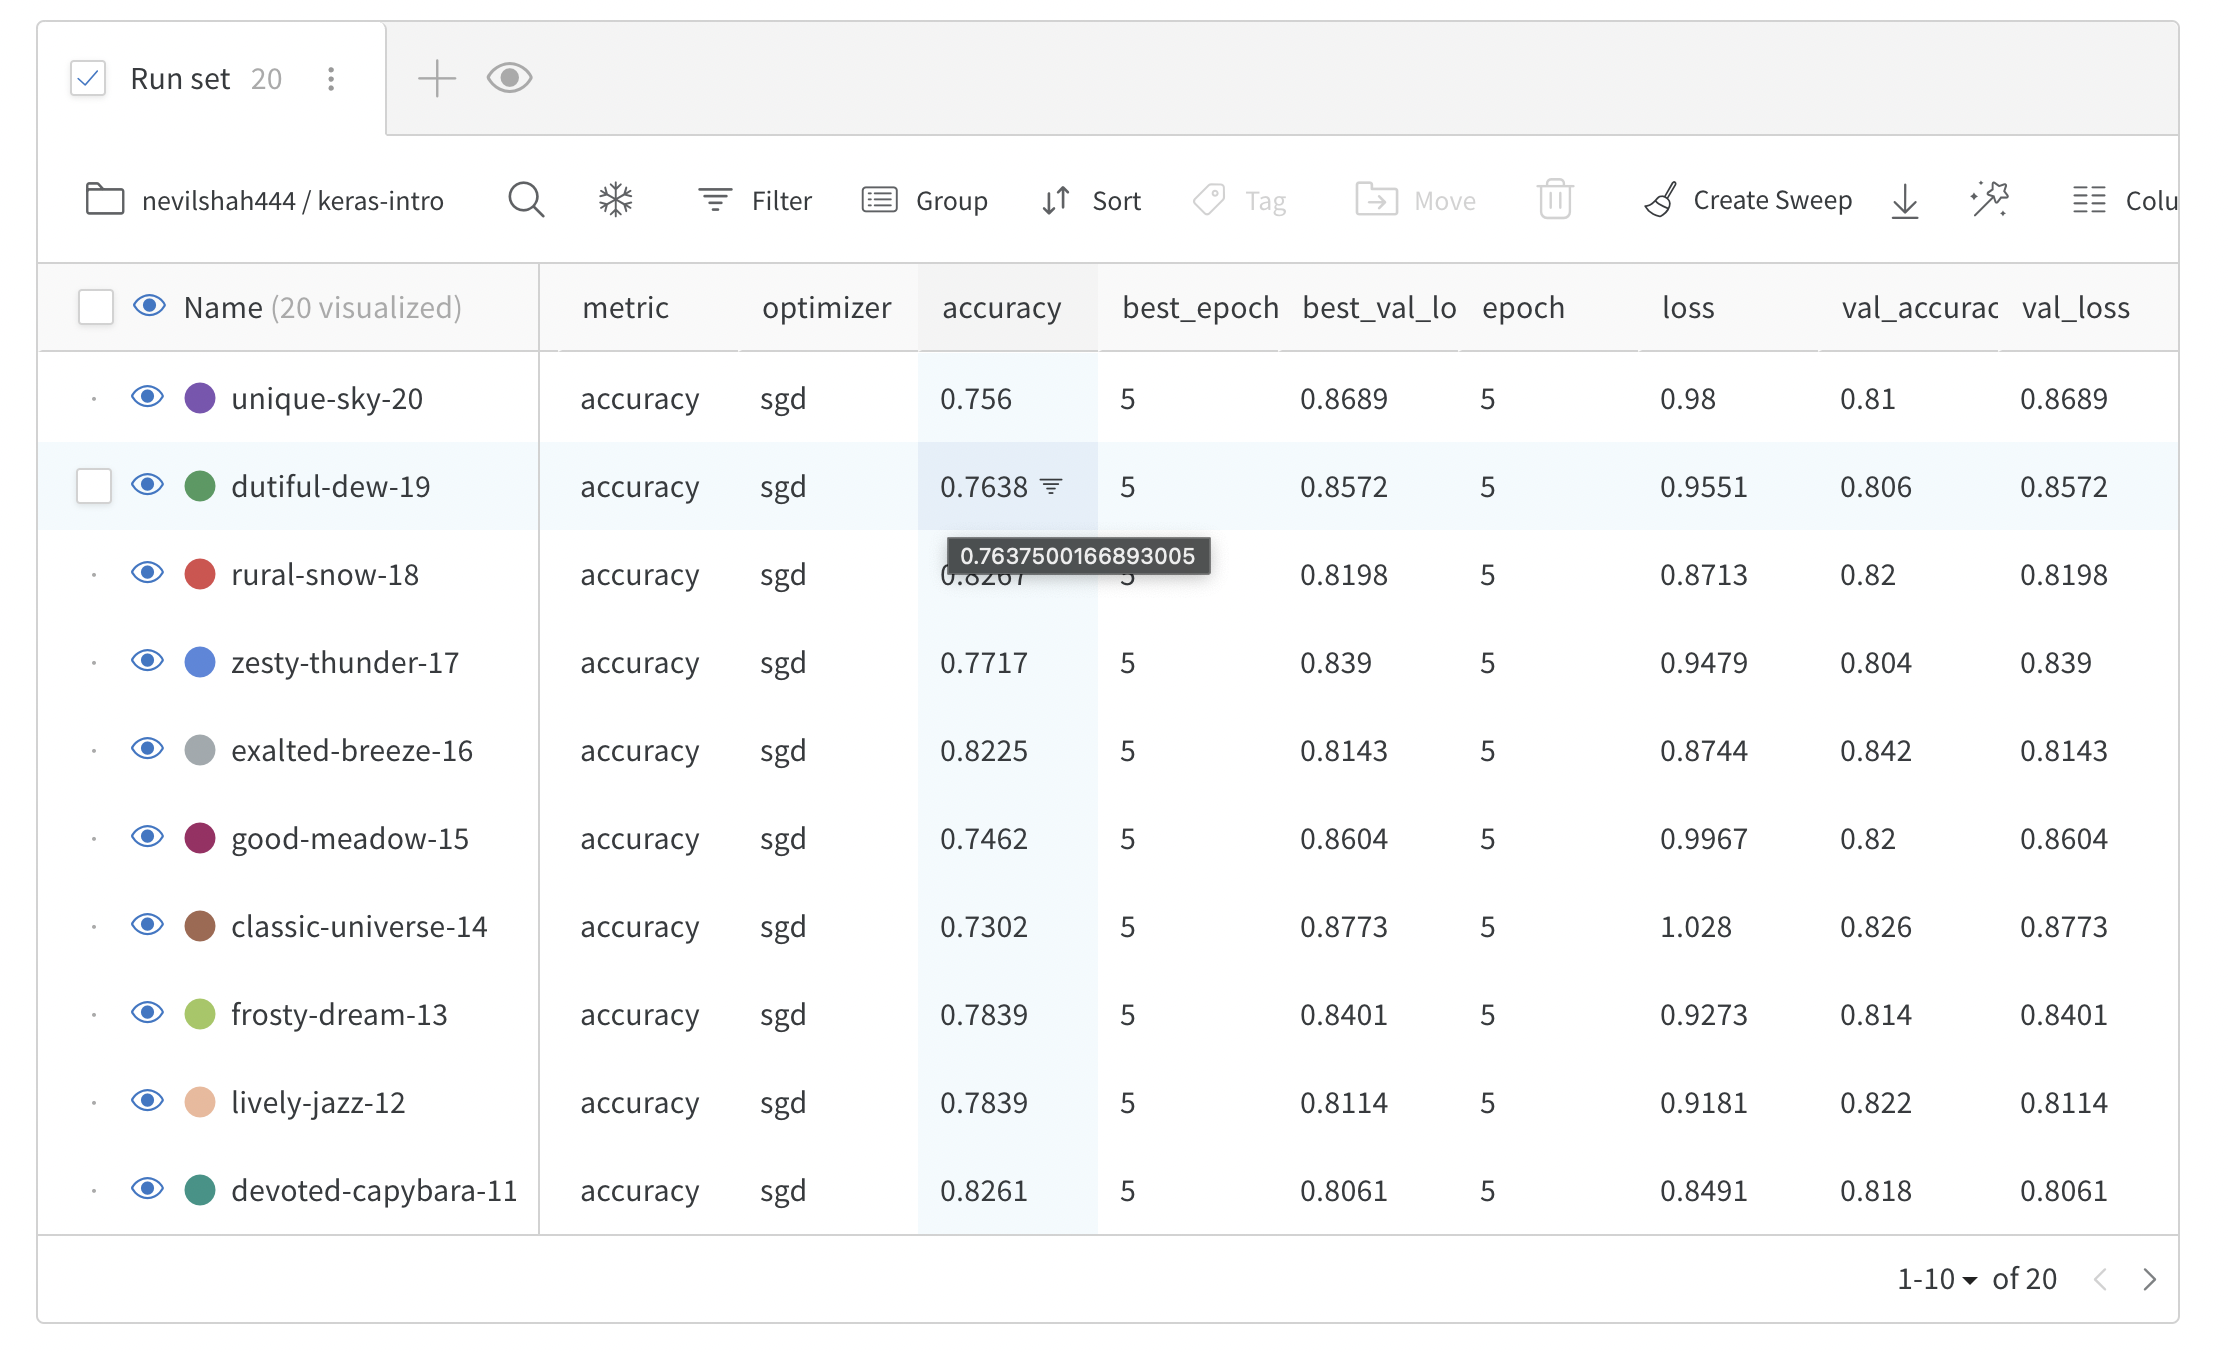

Conclusion: as per the report generated after training the MNIST dataset , we have used the following:

a) Optimizer: "sgd"

b) Activation function: "Relu" and "Softmax"

c) Loss function: sparse_categorical_crossentropy

And from the image, it can be said that the accuracy ranges from 75% to 83%

# **PyTorch**


We have already have set wanda.ai in the above section, so we have to start by defining the configurations needed to train and here also, we will use MNIST dataset.

In [4]:
import os
import random

import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm.notebook import tqdm

# Ensure deterministic behavior
torch.backends.cudnn.deterministic = True
random.seed(hash("setting random seeds") % 2**32 - 1)
np.random.seed(hash("improves reproducibility") % 2**32 - 1)
torch.manual_seed(hash("by removing stochasticity") % 2**32 - 1)
torch.cuda.manual_seed_all(hash("so runs are repeatable") % 2**32 - 1)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# remove slow mirror from list of MNIST mirrors
torchvision.datasets.MNIST.mirrors = [mirror for mirror in torchvision.datasets.MNIST.mirrors
                                      if not mirror.startswith("http://yann.lecun.com")]

In [5]:
config = dict(
    epochs=5,
    classes=10,
    kernels=[16, 32],
    batch_size=128,
    learning_rate=0.005,
    dataset="MNIST",
    architecture="CNN")

In [6]:
# By creating this function, there would be a method of communication between wanda servers and this code.
def model_pipeline(hyperparameters):

    # tell wandb to get started
    with wandb.init(project="pytorch-demo", config=hyperparameters):
      # access all HPs through wandb.config, so logging matches execution!
      config = wandb.config

      # make the model, data, and optimization problem
      model, train_loader, test_loader, criterion, optimizer = make(config)
      print(model)

      # and use them to train the model
      train(model, train_loader, criterion, optimizer, config)

      # and test its final performance
      test(model, test_loader)

    return model

In [7]:
def make(config):
    # data
    train, test = get_data(train=True), get_data(train=False)
    train_loader = make_loader(train, batch_size=config.batch_size)
    test_loader = make_loader(test, batch_size=config.batch_size)

    # model
    model = ConvNet(config.kernels, config.classes).to(device)

    # loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(
        model.parameters(), lr=config.learning_rate)
    
    return model, train_loader, test_loader, criterion, optimizer

Defining and moading the model 

In [8]:
def get_data(slice=5, train=True):
    full_dataset = torchvision.datasets.MNIST(root=".",
                                              train=train, 
                                              transform=transforms.ToTensor(),
                                              download=True)
    #  equiv to slicing with [::slice] 
    sub_dataset = torch.utils.data.Subset(
      full_dataset, indices=range(0, len(full_dataset), slice))
    
    return sub_dataset


def make_loader(dataset, batch_size):
    loader = torch.utils.data.DataLoader(dataset=dataset,
                                         batch_size=batch_size, 
                                         shuffle=True,
                                         pin_memory=True, num_workers=2)
    return loader

In [9]:
# Function for convolutional neural network which will be used in the further steps

class ConvNet(nn.Module):
    def __init__(self, kernels, classes=10):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, kernels[0], kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, kernels[1], kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7 * 7 * kernels[-1], classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

Model Training 🇰

In this section, we have defined some functions which will be required during training phase.

In [10]:
def train(model, loader, criterion, optimizer, config):
    wandb.watch(model, criterion, log="all", log_freq=10)

    total_batches = len(loader) * config.epochs
    example_ct = 0  # number of examples seen
    batch_ct = 0
    for epoch in tqdm(range(config.epochs)):
        for _, (images, labels) in enumerate(loader):

            loss = train_batch(images, labels, model, optimizer, criterion)
            example_ct +=  len(images)
            batch_ct += 1

            # Report metrics every 25th batch
            if ((batch_ct + 1) % 25) == 0:
                train_log(loss, example_ct, epoch)

In [11]:

def train_batch(images, labels, model, optimizer, criterion):
    images, labels = images.to(device), labels.to(device)
    
    # Forward pass ➡
    outputs = model(images)
    loss = criterion(outputs, labels)
    
    # Backward pass ⬅
    optimizer.zero_grad()
    loss.backward()

    # Step with optimizer
    optimizer.step()

    return loss

In [12]:
def train_log(loss, example_ct, epoch):
    # Where the magic happens
    wandb.log({"epoch": epoch, "loss": loss}, step=example_ct)
    print(f"Loss after " + str(example_ct).zfill(5) + f" examples: {loss:.3f}")

Model Testing🇰

In this section, we have defined some functions which will be required during testing phase.

In [13]:
def test(model, test_loader):
    model.eval()

    # Run the model 
    with torch.no_grad():
        correct, total = 0, 0
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f"Accuracy of the model on the {total} " +
              f"test images: {100 * correct / total}%")
        
        wandb.log({"test_accuracy": correct / total})

    # Save the model
    torch.onnx.export(model, images, "model.onnx")
    wandb.save("model.onnx")

In [14]:
# Build, train and analyze the model with the pipeline
model = model_pipeline(config)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


  0%|          | 0/5 [00:00<?, ?it/s]

Loss after 03072 examples: 0.353
Loss after 06272 examples: 0.253
Loss after 09472 examples: 0.125
Loss after 12640 examples: 0.122
Loss after 15840 examples: 0.043
Loss after 19040 examples: 0.099
Loss after 22240 examples: 0.078
Loss after 25408 examples: 0.065
Loss after 28608 examples: 0.017
Loss after 31808 examples: 0.049
Loss after 35008 examples: 0.036
Loss after 38176 examples: 0.021
Loss after 41376 examples: 0.088
Loss after 44576 examples: 0.047
Loss after 47776 examples: 0.038
Loss after 50944 examples: 0.020
Loss after 54144 examples: 0.013
Loss after 57344 examples: 0.037
Accuracy of the model on the 2000 test images: 98.0%



epoch,▁▁▁▃▃▃▃▅▅▅▅▆▆▆▆███
loss,█▆▃▃▂▃▂▂▁▂▁▁▃▂▂▁▁▁
test_accuracy,▁
epoch,4
loss,0.03693
test_accuracy,0.98


Conclusion; From above statistics, we can see that after training the PyTorch model using MNIST dataset, the loss value is just "0.086" and the model accuracy on the test dataset is as high as 98.5%